In [1]:
# Main setup
import imagej
ij = imagej.init(['io.github.mianalysis:mia-plugin:2.0.0-SNAPSHOT'])

from jpype import JClass
from scyjava import jimport
from src.wrappers.coordinateset import PythonCoordinateSetFactory
from src.wrappers.image import ImageWrapper
from src.wrappers.imagerenderer import NotebookImageRenderer
from src.wrappers.metadata import MetadataWrapper
from src.wrappers.obj import PythonObjFactory
from src.wrappers.volume import PythonVolumeFactory
from src.wrappers.workspace import WorkspaceWrapper

from src.modules.demomodule import ModuleDemo

import time

# Setting renderer
ImageI = jimport('io.github.mianalysis.mia.object.image.ImageI')
ImageI.setGlobalRenderer(NotebookImageRenderer(ij))
ImageI.setUseGlobalImageRenderer(True)

# Setting object factory
ObjFactories = jimport('io.github.mianalysis.mia.object.coordinates.ObjFactories')
obj_factory = PythonObjFactory()
ObjFactories.addFactory(obj_factory)
ObjFactories.setDefaultFactory(obj_factory)

# Setting volume factory
VolumeFactories = jimport('io.github.mianalysis.mia.object.coordinates.volume.VolumeFactories')
volume_factory = PythonVolumeFactory()
VolumeFactories.addFactory(volume_factory)
VolumeFactories.setDefaultFactory(volume_factory)

# Setting coordinateset factory
CoordinateSetFactories = jimport('io.github.mianalysis.mia.object.coordinates.volume.CoordinateSetFactories')
coordinate_set_factory = PythonCoordinateSetFactory()
CoordinateSetFactories.addFactory(coordinate_set_factory)
CoordinateSetFactories.setDefaultFactory(coordinate_set_factory)

# Module imports
FilterImage = jimport('io.github.mianalysis.mia.module.images.process.FilterImage')
IdentifyObjects = jimport('io.github.mianalysis.mia.module.objects.detect.IdentifyObjects')
ImageLoader = jimport('io.github.mianalysis.mia.module.inputoutput.ImageLoader')
ShowImage = jimport('io.github.mianalysis.mia.module.visualise.ShowImage')
ThresholdImage = jimport('io.github.mianalysis.mia.module.images.process.threshold.GlobalAutoThreshold')
AvailableModules = jimport('io.github.mianalysis.mia.module.AvailableModules')

OpenJDK 64-Bit Server VM warning: Attempt to protect stack guard pages failed.
OpenJDK 64-Bit Server VM warning: Attempt to deallocate stack guard pages failed.
ScriptEngineManager providers.next(): javax.script.ScriptEngineFactory: Provider org.scijava.plugins.scripting.scala.ScalaScriptLanguage could not be instantiated
ScriptEngineManager providers.next(): javax.script.ScriptEngineFactory: Provider org.scijava.plugins.scripting.scala.ScalaScriptLanguage could not be instantiated
ScriptEngineManager providers.next(): javax.script.ScriptEngineFactory: Provider org.scijava.plugins.scripting.scala.ScalaScriptLanguage could not be instantiated
ScriptEngineManager providers.next(): javax.script.ScriptEngineFactory: Provider org.scijava.plugins.scripting.scala.ScalaScriptLanguage could not be instantiated
[ERROR] Cannot create plugin: org.scijava.plugins.scripting.scala.ScalaScriptLanguage


[INFO] Overriding MIA; identifier: command:io.github.mianalysis.mia.MIA_; jar: file:/Users/sc13967/.jgo/io.github.mianalysis/mia-plugin/2.0.0-SNAPSHOT/d2fe3ba7f0550a523403e0d047b1788b5d374c2a09c72a0b89f635395f421067/mia-plugin-2.0.0-SNAPSHOT.jar
[INFO] Overriding MIA (headless); identifier: command:io.github.mianalysis.mia.MIAHeadless; jar: file:/Users/sc13967/.jgo/io.github.mianalysis/mia-plugin/2.0.0-SNAPSHOT/d2fe3ba7f0550a523403e0d047b1788b5d374c2a09c72a0b89f635395f421067/mia-core-2.0.0-SNAPSHOT.jar


In [2]:
# Example of adding modules
print(AvailableModules.getModuleNames(True).size())
AvailableModules.addModuleName(ModuleDemo(None))
print(AvailableModules.getModuleNames(False).size())

224
225


In [3]:
# Example of loading a module through reflection
cl = JClass(str(AvailableModules.getModuleNames(False).get(42)))
cc = cl(None) # The module constructor
print(cc.getShortDescription()) # Showing it's worked

Binarise an image in the workspace such that the output only has pixel values of 0 and 255.


In [4]:
input_path = "/Users/sc13967/Documents/Programming/Python/mia-python/Ex3_Skeletonisation.tif"
series_number = 1
image_name = "demo"
objects_name = "DNA"

# Defining WorkspaceWrapper as WorkspaceI@WorkspaceWrapper seems to allow default method access, 
# although this doesn't appear to support default methods with arguments

# workspace = WorkspaceWrapper(1, input_path, series_number, None)
WorkspaceI = jimport('io.github.mianalysis.mia.object.WorkspaceI')
workspace = WorkspaceI@WorkspaceWrapper(1, input_path, series_number, None)


In [5]:
imageLoader = ImageLoader(None)
imageLoader.updateParameterValue(ImageLoader.OUTPUT_IMAGE, image_name)
imageLoader.setShowOutput(False)
print(imageLoader.process(workspace))


PASS


In [6]:
filterImage = FilterImage(None)
filterImage.updateParameterValue(FilterImage.INPUT_IMAGE, image_name)
filterImage.updateParameterValue(FilterImage.FILTER_MODE, FilterImage.FilterModes.GAUSSIAN2D)
filterImage.updateParameterValue(FilterImage.FILTER_RADIUS, 5)
filterImage.setShowOutput(False)
print(filterImage.process(workspace))

PASS


In [7]:
thresholdImage = ThresholdImage(None)
thresholdImage.updateParameterValue(ThresholdImage.INPUT_IMAGE, image_name)
thresholdImage.setShowOutput(False)
print(thresholdImage.process(workspace))

PASS


[ERROR] java.lang.NullPointerException
	at io.github.mianalysis.mia.object.image.ImagePlusImage.convertImageToObjects(ImagePlusImage.java:129)
	at io.github.mianalysis.mia.object.image.ImagePlusImage.convertImageToObjects(ImagePlusImage.java:73)
	at io.github.mianalysis.mia.module.objects.detect.IdentifyObjects.process(IdentifyObjects.java:419)
	at io.github.mianalysis.mia.module.objects.detect.IdentifyObjects.process(IdentifyObjects.java:499)

[ERROR] java.lang.NullPointerException
	at io.github.mianalysis.mia.object.image.ImagePlusImage.convertImageToObjects(ImagePlusImage.java:129)
	at io.github.mianalysis.mia.object.image.ImagePlusImage.convertImageToObjects(ImagePlusImage.java:73)
	at io.github.mianalysis.mia.module.objects.detect.IdentifyObjects.process(IdentifyObjects.java:419)
	at io.github.mianalysis.mia.module.objects.detect.IdentifyObjects.process(IdentifyObjects.java:499)

[ERROR] java.lang.NullPointerException
	at io.github.mianalysis.mia.object.image.ImagePlusImage.conver

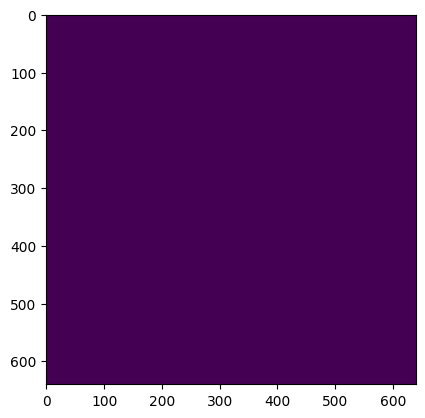

PASS


In [8]:
identifyObjects = IdentifyObjects(None)
identifyObjects.updateParameterValue(IdentifyObjects.INPUT_IMAGE, image_name)
identifyObjects.updateParameterValue(IdentifyObjects.OUTPUT_OBJECTS, objects_name)
identifyObjects.setShowOutput(True)

Exception = jimport('java.lang.Exception')
try:
    print(identifyObjects.process(workspace))
except Exception as ex:
    ex.printStackTrace() 



In [11]:
objects = workspace.getObjects(objects_name)
for object in objects.values():
    print(object.getNumberOfElements())

105446
230
16
4139
54
14
32
223
44
13
106
36
45
18
9
2437
61
66
9
12796
58
31
16
48
29
83
132
245
18
4958
38
61
26
106
102
9371
936
26
24
16402
69
3002
2488
329
3247
120
19
253
743
845


In [ ]:
print(1)